# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case three different functions, each with their own challenge.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem (or a combination of both!):
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2022 (latest update)

***

In [192]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
import sympy as sy

Load external functions:

In [193]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

Set the parameters of the program:

In [194]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000    # Number of random points to be generated

## Problem 1: 

#### Produce random points following $f(x) \sim \exp(-x/3), x \in [0, \infty]$.

3*log(-1/(U - 1))


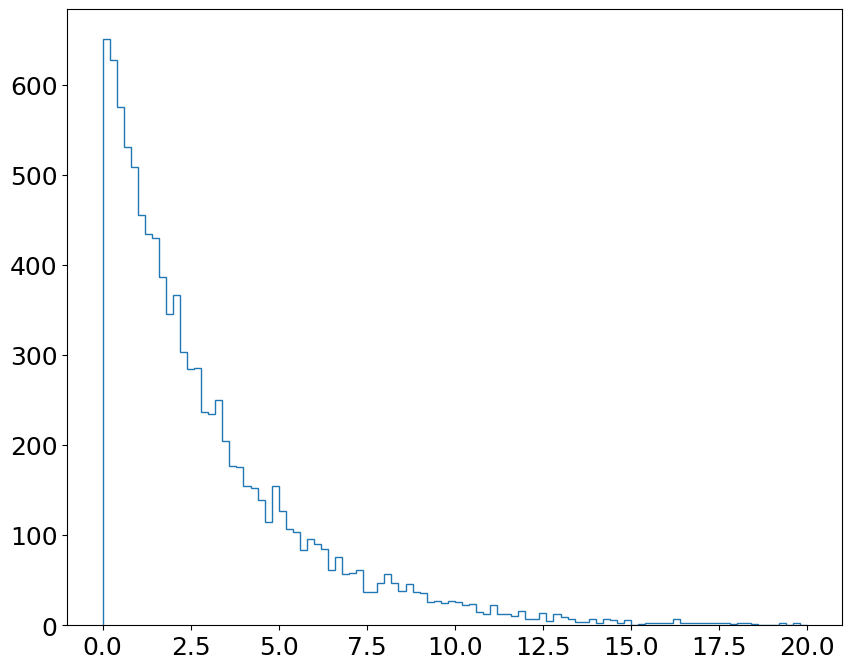

In [195]:
# Define a reasonable range to plot in:
xmin = 0
xmax = 20
N_bins = 100
bin_width = (xmax-xmin)/N_bins

#use sympy to do the integration
x, U = sy.symbols('x U')
f = sy.exp(-x/3)
I_plot = sy.integrate(f, (x, 0, x))
I_norm = sy.integrate(f, (x, 0, sy.oo))
F_1 = sy.solve(U - I_plot/I_norm, x)[0]
print(F_1)
F_1 = sy.lambdify(U, F_1, 'numpy')


# Generate the random points:
uni = np.random.uniform(0,1,size= N_points)

exp = F_1(uni)

# Plot the random points:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(exp, bins=N_bins, range=(xmin, xmax), histtype='step', label='Random points');


## Problem 2: 

#### Produce random points following $g(x) \sim x \cos(x), x \in [0, \frac{\pi}{2}]$.

In [196]:
N_try = 0
ymin = 0.0
ymax = 1
N_points = 10000
x_accepted = np.zeros(N_points)

In [197]:
xmin2, xmax2 = 0, np.pi/2         # Note the simple/short notation.
N_bins = 100
bin_width = (xmax2-xmin2)/N_bins

def func(x):
    return x*np.cos(x)

for i in range(N_points):
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin2, xmax2)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, ymax)
        
        if (y_test < x_test*np.cos(x_test)):
            break
    x_accepted[i] = x_test

eff = N_points / N_try                        
# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral =  eff * (xmax2-xmin2) * (ymax-ymin)

# Error on integral
eintegral = eff_error * (xmax2-xmin2) * (ymax-ymin)  

print(f"\nIntegral of f(x) = 2x, x in [0, 1] is: \t {integral:7.4f} +- {eintegral:6.4f}")
print(f"The efficiency of the Accept/Reject method used here is: \t {eff:.2%} +/- {eff_error:.2%}")


Integral of f(x) = 2x, x in [0, 1] is: 	  0.5704 +- 0.0046
The efficiency of the Accept/Reject method used here is: 	 36.31% +/- 0.29%


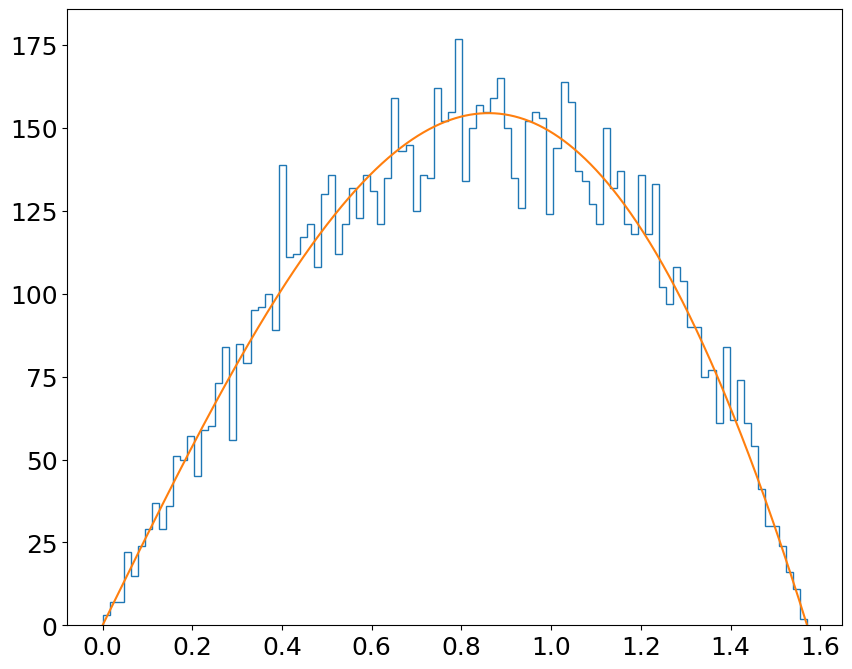

In [198]:
fig, ax = plt.subplots(figsize=(10, 8))
#x = np.linspace(xmin2, xmax2, 1000)
count, bins, _ = ax.hist(x_accepted, bins=N_bins, range=(xmin2, xmax2), histtype='step', label='Random points');
x = np.linspace(xmin2, xmax2, 1000)
ax.plot(x, func(x)/integral * bin_width * N_points, label='f(x)')


## Problem 3: 

#### Produce random points following $h(x) \sim \exp(-x/3)\cos(x)^2$ in the interval $[0, \infty]$ and estimate the integral of $h(x)$ in the defined range.

In [215]:
N_try = 0
xmin, xmax = 0, 10         # Note the simple/short notation.
N_bins = 100
bin_width = (xmax-xmin)/N_bins
ymin = 0.0

def func(x):
    return np.exp(-x/3)*np.cos(x)**2

for i in range(N_points):
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform()
        x_exp_test = F_1(x_test)
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, np.exp(-x_exp_test/3))
        
        if (y_test < func(x_exp_test)):
            break
    x_accepted[i] = x_exp_test

eff = N_points / N_try                        
# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral =  eff * 3

# Error on integral
eintegral = eff_error * (xmax-xmin) * (ymax-ymin)  

print(f"\nIntegral of f(x) = e^(-x/3)*cos^2(x), x in [0, inf] is: \t {integral:7.4f} +- {eintegral:6.4f}")
print(f"The efficiency of the Accept/Reject method used here is: \t {eff:.2%} +/- {eff_error:.2%}")



Integral of f(x) = e^(-x/3)*cos^2(x), x in [0, inf] is: 	  1.5481 +- 0.0359
The efficiency of the Accept/Reject method used here is: 	 51.60% +/- 0.36%


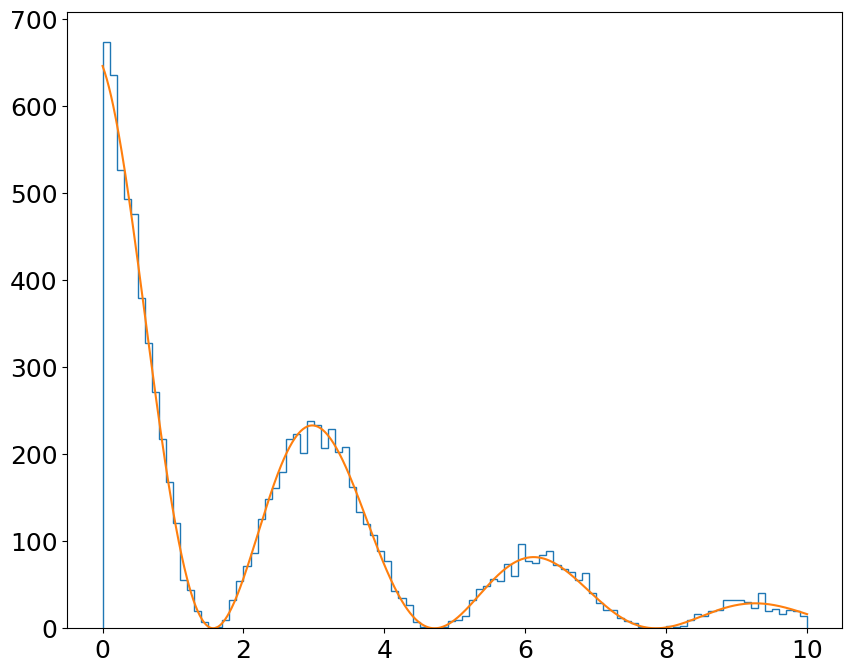

In [216]:
## plot the function
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(x_accepted, bins=N_bins, range=(xmin, 10), histtype='step', label='Random points');
x = np.linspace(xmin, xmax, 1000)
ax.plot(x, func(x)/integral * bin_width * N_points, label='f(x)')

# Learning points:

While you should by now be able to solve problem 1+2 with at least one of the methods, problem 3 is harder, and requires the combination of the two. Solving this exercise should make you:
1. "proficient" in using the two standard methods.
2. capable of getting random numbers according to ALL 1D PDFs, bounded/integrable/invertible or not.

The last point of problem 3 should also illustrate, how you can estimate integrals using this method.